# [IntoAI] WEEK5 : Linear Regression

### 설정

In [42]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Feature 1개인 경우

In [43]:
import numpy as np

# X=길이, y=너비인 데이터 30개 직접 생성성
# 길이를 가지고 너비를 예측

X = np.array([[4.7], [5.0], [6.1], [4.4], [4.9], [5.2], [3.8], [4.9], [4.8], [5.8],
          [4.6], [5.5], [6.0], [5.0], [5.6], [4.4], [4.6], [5.3], [5.0], [4.7],
          [5.4], [5.6], [4.5], [4.8], [6.1], [5.5], [5.9], [4.2], [5.2], [5.7]])
y = np.array([[3.2], [3.5], [3.6], [2.9], [3.0], [3.5], [2.6], [2.9], [2.9], [3.7],
         [3.0], [3.7], [3.9], [3.5], [3.3], [3.0], [2.6], [2.8], [3.3], [3.2],
         [3.1], [3.3], [2.9], [3.0], [3.8], [3.4], [3.6], [3.2], [3.7], [3.5]])

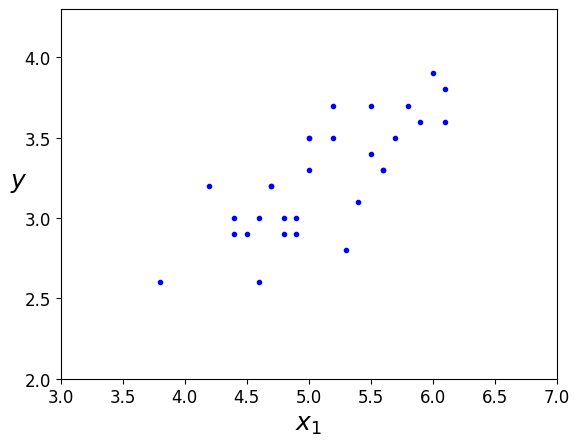

In [44]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([3, 7, 2, 4.3])
plt.show()

**식 4-4: 정규 방정식 (세타값을 찾기위함)**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [45]:
X_b = np.c_[np.ones((30, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [46]:
theta_best

array([[0.89989562],
       [0.46085595]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [47]:
X_new = np.array([[3], [7]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[2.28246347],
       [4.12588727]])

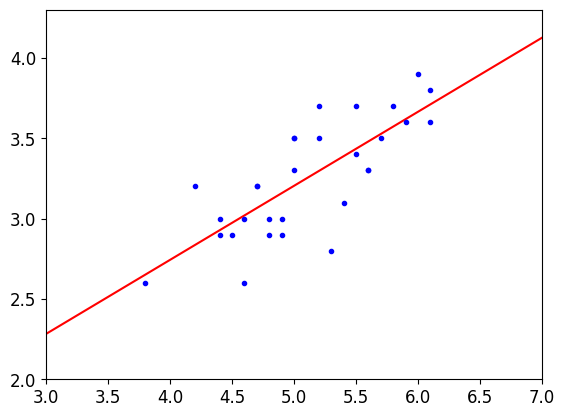

In [48]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([3, 7, 2, 4.3])
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.89989562]), array([[0.46085595]]))

In [50]:
lin_reg.predict(X_new)

array([[2.28246347],
       [4.12588727]])

# 경사 하강법
## 배치 경사 하강법

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [51]:
eta = 0.01
n_iterations = 100
m = 30

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [52]:
theta 

array([[0.62973575],
       [0.5131018 ]])

In [53]:
X_new_b.dot(theta) 

array([[2.16904115],
       [4.22144836]])

In [54]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 100
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    #plt.axis([3, 7, 2, 4.3])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

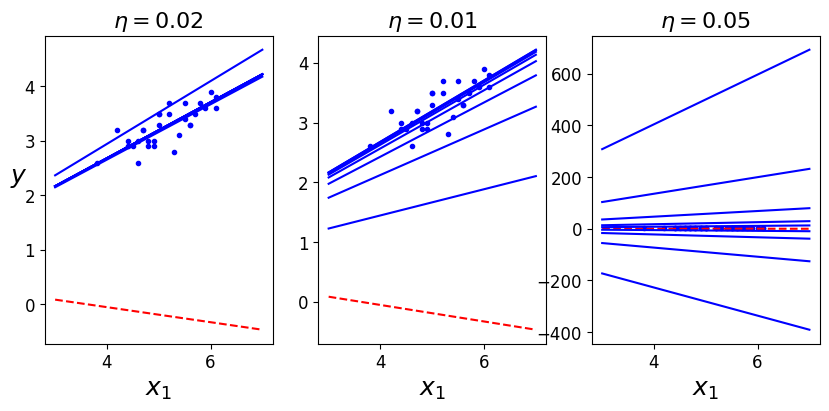

In [55]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.01, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.05)
plt.show()

## 확률적 경사 하강법

In [56]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

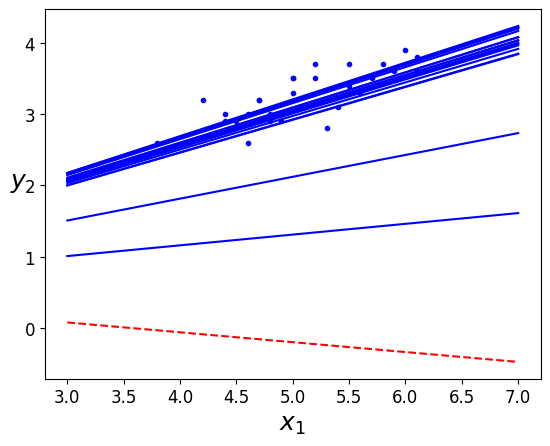

In [57]:
n_epochs = 1000
t0, t1 = 1, 100  

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
#plt.axis([3, 7, 2, 4.3])                                                           
plt.show()                                           

In [58]:
theta

array([[0.67525211],
       [0.50635477]])

In [59]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [60]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.34901465]), array([0.54103313]))

## 미니배치 경사 하강법

In [61]:
theta_path_mgd = []

n_iterations = 100
minibatch_size = 4

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 1, 30
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [62]:
theta

array([[0.64148819],
       [0.51099415]])

In [63]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

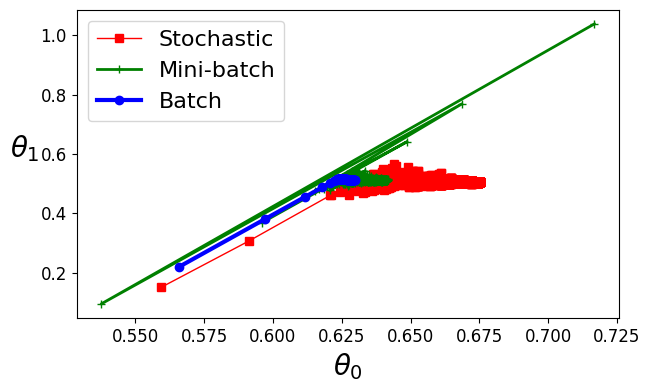

In [64]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
#plt.axis([3, 7, 2, 4.3])
plt.show()

# 다항 회귀

In [65]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [66]:
m = 30

# 앞에서 만든 X 사용
X = np.array([[4.7], [5.0], [6.1], [4.4], [4.9], [5.2], [3.8], [4.9], [4.8], [5.8],
          [4.6], [5.5], [6.0], [5.0], [5.6], [4.4], [4.6], [5.3], [5.0], [4.7],
          [5.4], [5.6], [4.5], [4.8], [6.1], [5.5], [5.9], [4.2], [5.2], [5.7]])
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

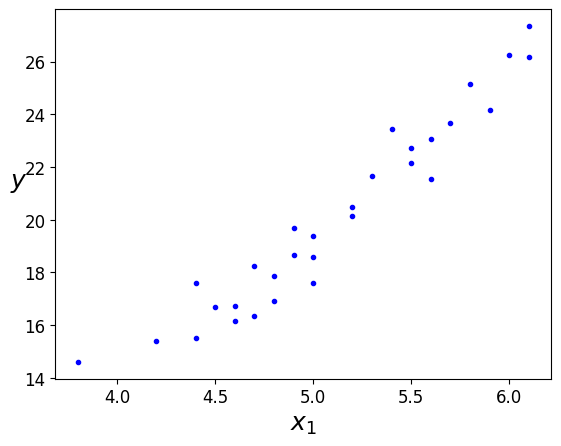

In [67]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([4.7])

In [69]:
X_poly[0]

array([ 4.7 , 22.09])

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([25.84123422]), array([[-8.32881894,  1.39367824]]))

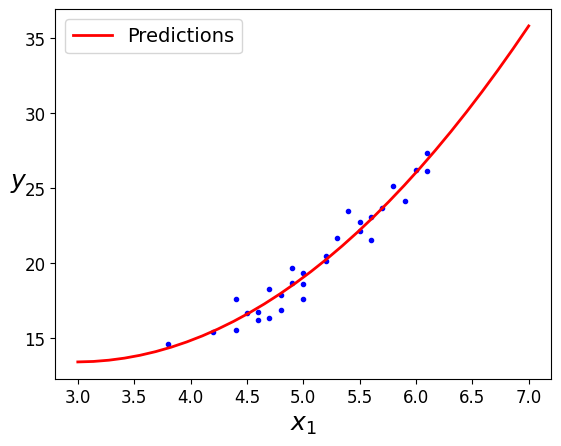

In [71]:
X_new=np.linspace(3,7, 30).reshape(30, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

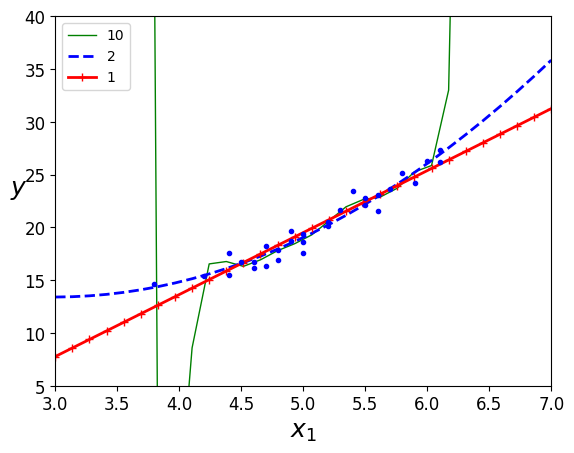

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 10), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([3, 7, 5, 40])
plt.show()

# 학습 곡선

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

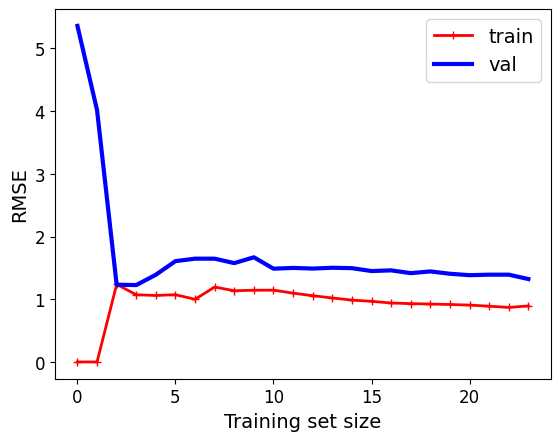

In [74]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
#plt.axis([0, 80, 0, 3])                          
plt.show()                                      

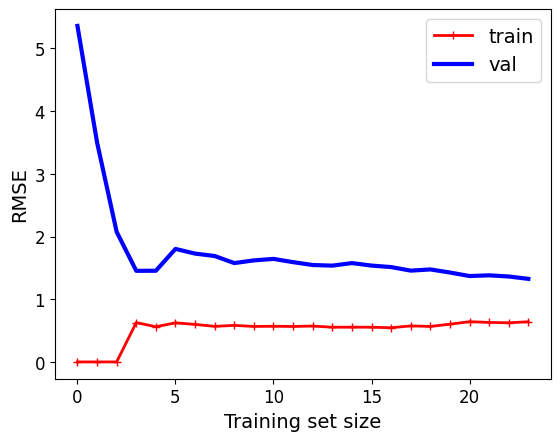

In [75]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
#plt.axis([0, 80, 0, 3])           
plt.show()                        

# Feature 2개 이상인 경우 

국어 수학 영어 성적으로 과학 성적 예측

In [76]:
X1 = np.array([[90], [89], [80], [67], [75], [90], [95], [98], [82], [50], #국어
          [64], [70], [79], [61], [88], [84], [90], [91], [58], [75],
          [80], [89], [93], [90], [84], [75], [72], [88], [70], [91]])
X2 = np.array([[91], [86], [77], [69], [80], [80], [90], [98], [88], [60], #수학
          [70], [72], [88], [75], [92], [89], [85], [94], [65], [85],
          [85], [88], [87], [88], [90], [89], [75], [92], [78], [85]])
X3 = np.array([[95], [85], [86], [76], [73], [95], [94], [90], [86], [65], #영어
          [75], [80], [89], [80], [91], [80], [96], [90], [68], [70],
          [77], [85], [88], [86], [90], [70], [83], [85], [82], [94]])
y = np.array([[89], [90], [86], [75], [80], [93], [90], [90], [89], [65], #과학
          [81], [75], [76], [65], [92], [87], [95], [80], [70], [81],
          [78], [84], [95], [88], [90], [82], [80], [85], [75], [95]])

In [77]:
X = np.concatenate((X1, X2, X3), axis=1)
y = y.ravel()

In [78]:
# 세타값 찾기 

X_b = np.c_[np.ones((30, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [79]:
theta_best

array([ 4.54598831e+01,  8.50357952e-01, -3.44537850e-01, -2.08524991e-02])

In [80]:
X_new = np.array([[90, 80, 70]])
X_new_b = np.c_[np.ones((1, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([92.96939587])

In [81]:
# 패키지 사용

import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y,)
lin_reg.intercept_, lin_reg.coef_

(45.45988312540853, array([ 0.85035795, -0.34453785, -0.0208525 ]))

In [82]:
new_data = np.array([[90, 80, 85]])  
prediction = lin_reg.predict(new_data)

print("예측된 과학성적은 :", prediction)

예측된 과학성적은 : [92.65660838]
